In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [2]:
# دو سهام داریم که از توزیع نرمال با پارامتر های(10,1) و (10,5) پیروی می کنند.
stocks = pd.DataFrame( {"Stock A" : np.random.normal(10,1,size=10), "Stock B" : np.random.normal(10,5,size=10)} )
stocks.index.name = "Months"
stocks = round(stocks,2)
stocks

,Stock A,Stock B
Months,,
0,10.63,17.45
1,9.84,-1.77
2,10.55,9.44
3,8.81,10.57
4,10.88,10.88
5,10.38,5.50
6,9.91,14.19
7,8.61,3.61
8,10.33,19.05


In [3]:
# محاسبه بازده با استفاده از متد shift()
stocks["Stock A Rets"] = stocks["Stock A"]/stocks["Stock A"].shift(1) - 1
stocks["Stock B Rets"] = stocks["Stock B"]/stocks["Stock B"].shift(1) - 1
stocks = round(stocks,2)
stocks

,Stock A,Stock B,Stock A Rets,Stock B Rets
Months,,,,
0,10.63,17.45,NaN,NaN
1,9.84,-1.77,-0.07,-1.10
2,10.55,9.44,0.07,-6.33
3,8.81,10.57,-0.16,0.12
4,10.88,10.88,0.23,0.03
5,10.38,5.50,-0.05,-0.49
6,9.91,14.19,-0.05,1.58
7,8.61,3.61,-0.13,-0.75
8,10.33,19.05,0.20,4.28


یا یک راه دیگر دیگر برای یافتن بازدهی استفاده از متد زیر است

pct_change()

In [4]:
returns = stocks.pct_change()
returns

,Stock A,Stock B,Stock A Rets,Stock B Rets
Months,,,,
0,NaN,NaN,NaN,NaN
1,-0.074318,-1.101433,NaN,NaN
2,0.072154,-6.333333,-2.000000,4.754545
3,-0.164929,0.119703,-3.285714,-1.018957
4,0.234960,0.029328,-2.437500,-0.750000
5,-0.045956,-0.494485,-1.217391,-17.333333
6,-0.045279,1.580000,0.000000,-4.224490
7,-0.131181,-0.745595,1.600000,-1.474684
8,0.199768,4.277008,-2.538462,-6.706667


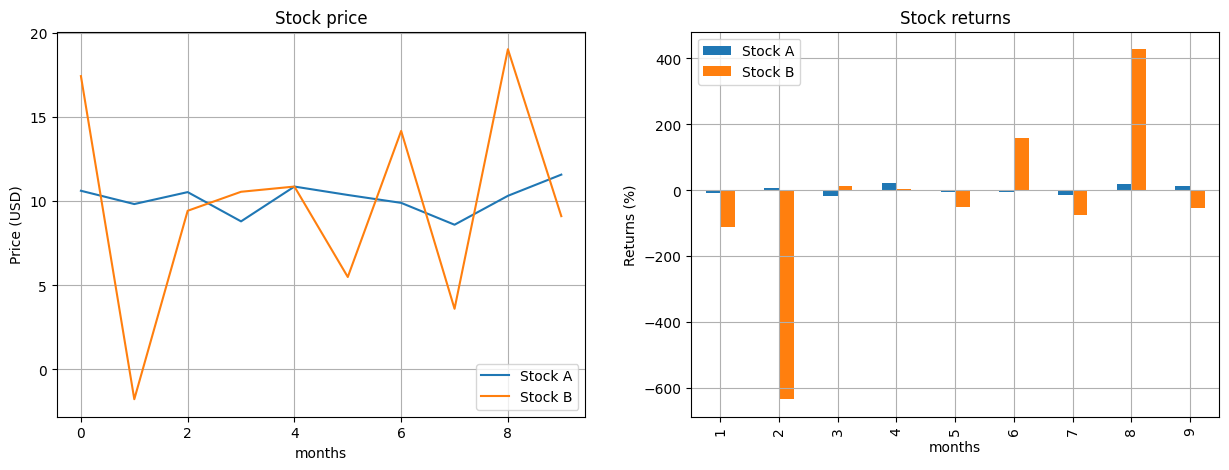

In [5]:
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot( stocks[["Stock A","Stock B"]] )
ax[0].set_title('Stock price')
ax[0].set_xlabel("months") 
ax[0].set_ylabel("Price (USD)")
ax[0].legend(["Stock A","Stock B"])
ax[0].grid()
(stocks[["Stock A Rets","Stock B Rets"]].drop(index=0,axis=0)*100).plot.bar(ax=ax[1]) 
ax[1].set_title('Stock returns')
ax[1].set_xlabel("months") 
ax[1].set_ylabel("Returns (%)") 
ax[1].legend(["Stock A","Stock B"])
ax[1].grid()
plt.show()

In [6]:
# محاسبه بازده کل (مرکب) با استفاده از تابع 
# prod()

total_ret = (1 + stocks[["Stock A Rets","Stock B Rets"]]).prod() - 1 
print("Total returns (%):")
total_ret*100

Total returns (%):


Stock A Rets     8.496782
Stock B Rets   -48.738949
dtype: float64

In [7]:
# محاسبه میانگین و نوسانات سهام ها
means      = stocks[["Stock A Rets","Stock B Rets"]].mean()
volatility = stocks[["Stock A Rets","Stock B Rets"]].std()
print("Means:")
print(means)
print("----------------------------")
print("Volatility:")
print(volatility)

Means:
Stock A Rets    0.017778
Stock B Rets   -0.353333
dtype: float64
----------------------------
Volatility:
Stock A Rets    0.142195
Stock B Rets    2.785193
dtype: float64


In [8]:
# annualizing the volatility
ann_volatility = volatility * np.sqrt(12)
ann_volatility

Stock A Rets    0.492578
Stock B Rets    9.648192
dtype: float64

### Return on risk 

In [9]:
ROR = total_ret / volatility
print("Return on risk:")
ROR

Return on risk:


Stock A Rets    0.597544
Stock B Rets   -0.174993
dtype: float64

این نسبت اندازه گیری هر چه بزرگتر باشد مبین این است که به ازای هر واحد ریسک,بازده بیشتری کسب میکنیم و لذا سهامی را انتخاب میکنیم که این نسبت در آن بزرگ تر باشد

### Sharpe Ratio
زمانی که دارایی بدون ریسک را در بازار در نظر بگیریم, نسبت شارپ معنا پیدا میکند که از **بازده مازاد** استفاده میکند و از رابطه زیر محاسبه می گردد
$$
\lambda := \frac{E_R}{\sigma}
\quad\text{where}\quad
E_R := R - R_F, 
$$


In [10]:
# فرض نرخ بازده بدون ریسک برابر 3 درصد
risk_free_rate = 0.03 
excess_return  = total_ret - risk_free_rate
sharpe_ratio   = excess_return / volatility
sharpe_ratio

Stock A Rets    0.386566
Stock B Rets   -0.185764
dtype: float64